In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# read data to dataframe
#df_2011 = pd.read_csv('./2011 Stack Overflow Survey Results.csv', encoding = "utf-8")
df_2021 = pd.read_csv('./survey_results_public.csv', encoding = "utf-8")
df_2021_schema = pd.read_csv('./survey_results_schema.csv', encoding = "utf-8")


In [3]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [4]:
df_2021.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

df = pd.DataFrame(data=df_2021.columns, columns=['col21'])

col_dict = {'col21':[], 'q21':[], 'q11':[]}
for col in df_2021.columns:
    col_dict['col21'].append(col)
    qname = col.replace('HaveWorkedWith','').replace('WantToWorkWith','')
    try:
        question = df_2021_schema['question'][df_2021_schema['qname'] == qname].iloc[0]
        if question in df_2011.columns:
            q11 = question
        else:
            q11 = ''
    except:
        question = ''
        q11 = ''
    col_dict['q21'].append(question)
    col_dict['q11'].append(q11)
df = pd.DataFrame(data=col_dict)

df

In [5]:
df_2021['LanguageHaveWorkedWith'].value_counts()

Python                                                                                                 1337
HTML/CSS;JavaScript;Node.js;TypeScript                                                                  811
Java                                                                                                    715
HTML/CSS;JavaScript;PHP;SQL                                                                             674
C#                                                                                                      597
                                                                                                       ... 
Assembly;Bash/Shell;C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Perl;PHP;Python;SQL;VBA       1
C#;C++;Dart;Go;JavaScript;Node.js;SQL;TypeScript                                                          1
Bash/Shell;C;C++;Groovy;HTML/CSS;Java;JavaScript;Node.js;SQL;TypeScript                                   1
Bash/Shell;C;HTML/CSS;JavaSc

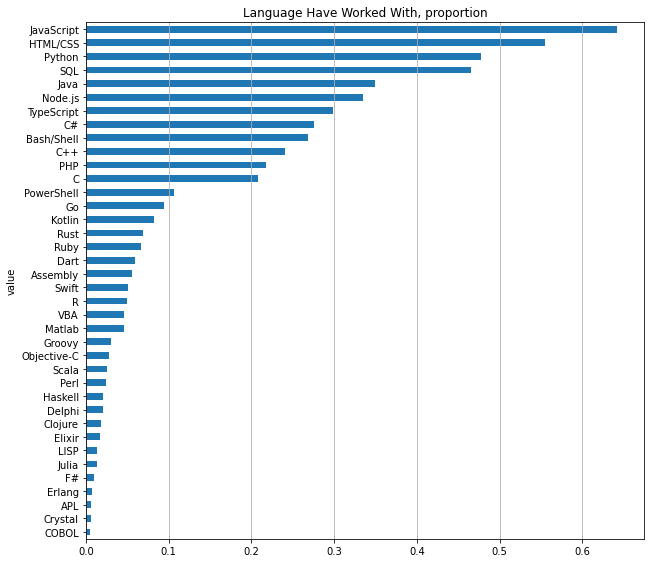

,count
value,
COBOL,0.005237
Crystal,0.005585
APL,0.006424
Erlang,0.007802
F#,0.009636
Julia,0.012800
LISP,0.013135
Elixir,0.017234
Clojure,0.018600


In [6]:
from collections import defaultdict

def get_possible_vals(col):
    return(set([val.strip() for sublist in col.dropna().str.split(";").tolist() for val in sublist]))

def get_total_counts(df, col, col_suffix=''):
    df_val_counts = df[col].value_counts().reset_index()
    df_val_counts = df_val_counts.rename(columns={'index': 'value', col: 'count'})
    possible_vals = get_possible_vals(df[col])

    new_df = defaultdict(int)
    #loop through list of possible values
    for val in possible_vals:
        #loop through rows
        for idx in range(df_val_counts.shape[0]):
            row_vals = df_val_counts['value'][idx].split(";")
            if val in row_vals:
                new_df[val] += int(df_val_counts['count'][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = ['value', 'count'+col_suffix]
    #new_df.sort_values('count'+col_suffix, ascending=False, inplace=True)
    return new_df

def clean_and_plot(df, col, col_suffix='', title='', plot=True):
    '''
    INPUT 
        df - DataFrame, data
        col - string, holding the column name
        title - string the title of your plot
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        df_counts - DataFrame, value counts
        Displays a plot values for the column.
    '''
    df_coounts = get_total_counts(df, col, col_suffix)

    df_prop = df_coounts.sort_values('count'+col_suffix, ascending=True).set_index('value')
    df_prop = df_prop/df[col].shape[0]
    if plot:
        #(df_coounts/df_coounts.sum()).plot(kind='bar', legend=None);
        df_prop.plot(kind='barh',figsize=(10,0.25*len(df_prop)), legend=None).grid(axis='x');
        plt.title(title);
        plt.show()
    return df_prop

df_lang_worked = clean_and_plot(df_2021, col='LanguageHaveWorkedWith', title='Language Have Worked With, proportion')
df_lang_worked

In [7]:
df_2021['Country'].value_counts()

United States of America                                15288
India                                                   10511
Germany                                                  5625
United Kingdom of Great Britain and Northern Ireland     4475
Canada                                                   3012
                                                        ...  
Saint Kitts and Nevis                                       1
Dominica                                                    1
Saint Vincent and the Grenadines                            1
Tuvalu                                                      1
Papua New Guinea                                            1
Name: Country, Length: 181, dtype: int64

In [8]:
df_us = df_2021[df_2021['Country']=='United States of America']
df_in = df_2021[df_2021['Country']=='India']
df_ge = df_2021[df_2021['Country']=='Germany']
df_uk = df_2021[df_2021['Country']=='United Kingdom of Great Britain and Northern Ireland']
df_ca = df_2021[df_2021['Country']=='Canada']
df_ru = df_2021[df_2021['Country']=='Russian Federation']
df_ch = df_2021[df_2021['Country']=='China']


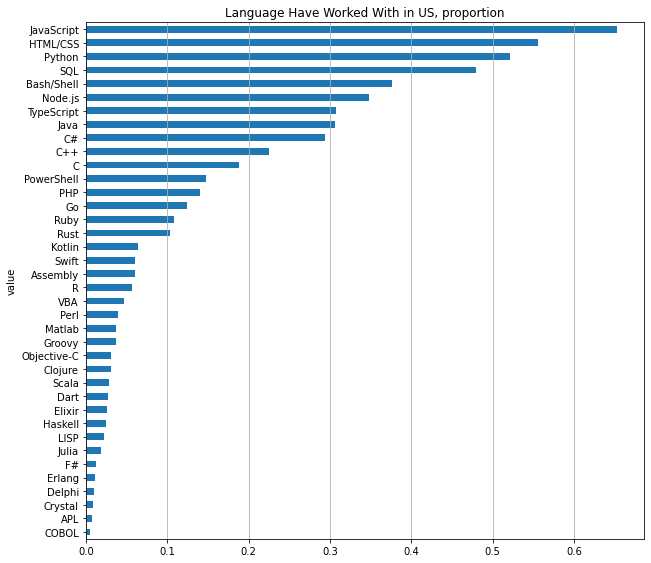

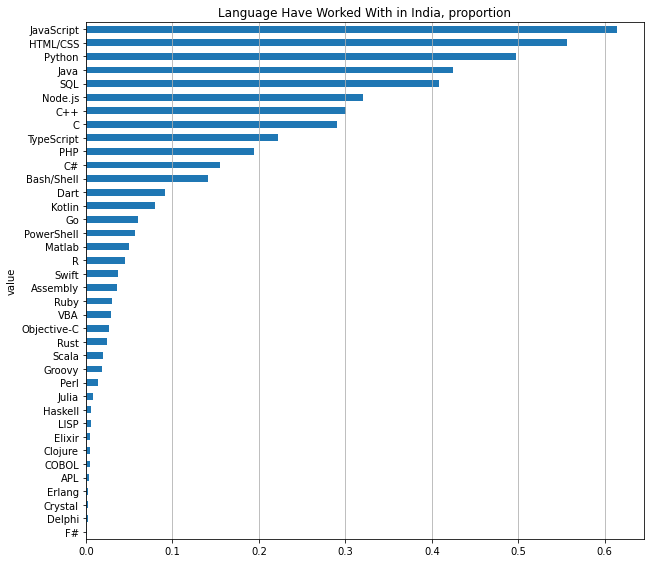

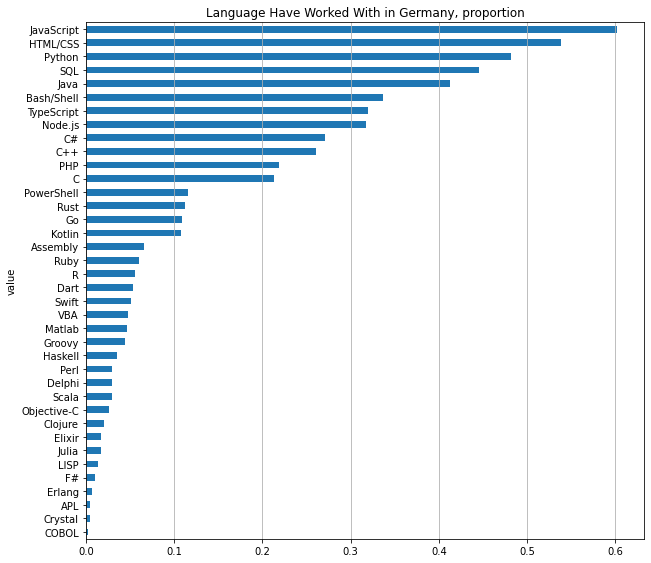

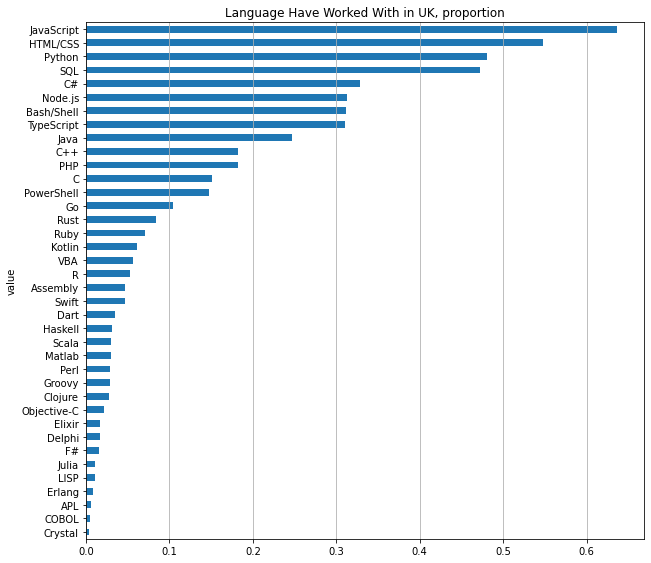

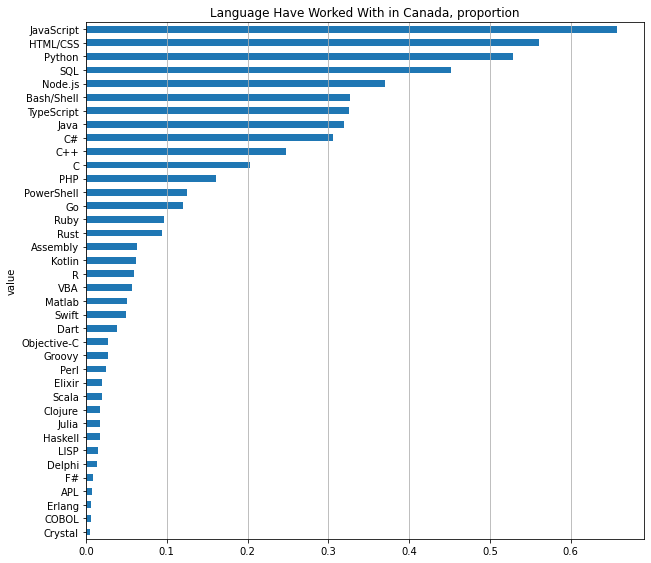

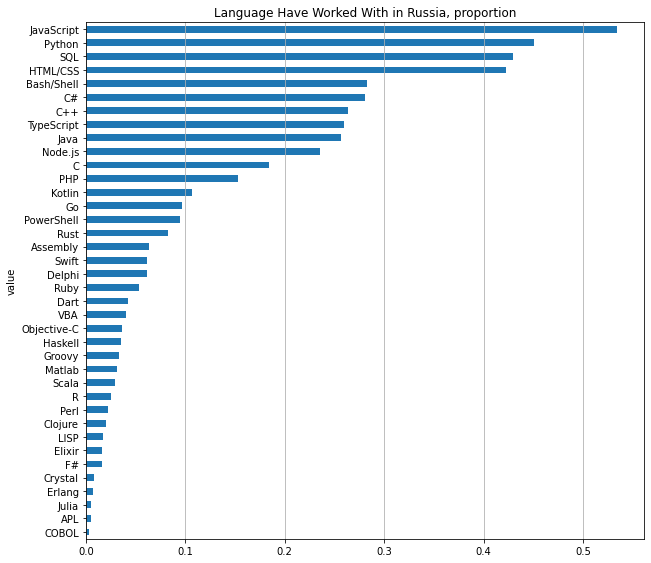

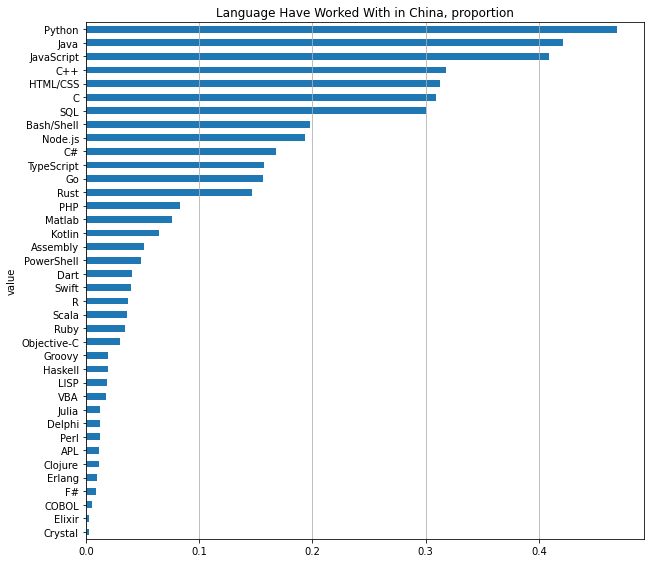

In [9]:
df_lang_worked_us = clean_and_plot(df_us, col='LanguageHaveWorkedWith', col_suffix='_us', title='Language Have Worked With in US, proportion')
df_lang_worked_in = clean_and_plot(df_in, col='LanguageHaveWorkedWith', col_suffix='_in', title='Language Have Worked With in India, proportion')
df_lang_worked_ge = clean_and_plot(df_ge, col='LanguageHaveWorkedWith', col_suffix='_ge', title='Language Have Worked With in Germany, proportion')
df_lang_worked_uk = clean_and_plot(df_uk, col='LanguageHaveWorkedWith', col_suffix='_uk', title='Language Have Worked With in UK, proportion')
df_lang_worked_ca = clean_and_plot(df_ca, col='LanguageHaveWorkedWith', col_suffix='_ca', title='Language Have Worked With in Canada, proportion')
df_lang_worked_ru = clean_and_plot(df_ru, col='LanguageHaveWorkedWith', col_suffix='_ru', title='Language Have Worked With in Russia, proportion')
df_lang_worked_ch = clean_and_plot(df_ch, col='LanguageHaveWorkedWith', col_suffix='_ch', title='Language Have Worked With in China, proportion')


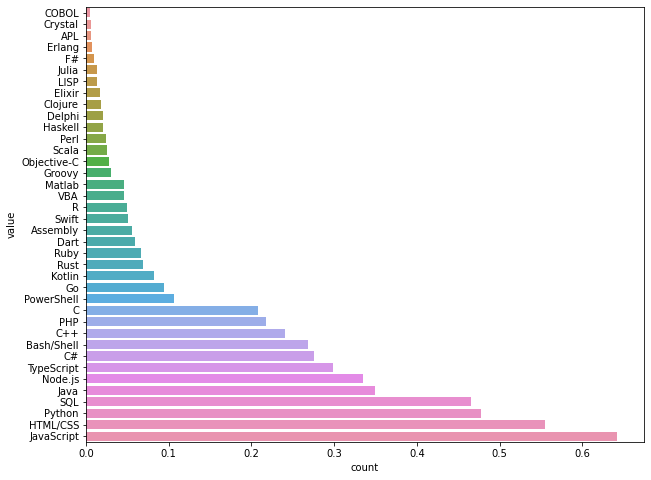

In [10]:
plt.figure(figsize=(10,8))
sns.barplot(x='count', y=df_lang_worked.index, data=df_lang_worked);


In [11]:
df_lang_worked_joined = df_lang_worked_us.join(
    df_lang_worked_in).join(
    df_lang_worked_ge).join(
    df_lang_worked_uk).join(
    df_lang_worked_ca).join(
    df_lang_worked_ru).join(
    df_lang_worked_ch)
df_lang_worked_joined

,count_us,count_in,count_ge,count_uk,count_ca,count_ru,count_ch
value,,,,,,,
COBOL,0.005364,0.004567,0.002844,0.004469,0.005644,0.002714,0.005687
APL,0.007326,0.004091,0.004444,0.006034,0.006972,0.004749,0.011374
Crystal,0.008830,0.002283,0.004267,0.003799,0.004648,0.008141,0.002844
Delphi,0.009942,0.001998,0.029156,0.016536,0.014276,0.061058,0.012322
Erlang,0.010531,0.002854,0.006578,0.008045,0.006308,0.007463,0.009479
F#,0.012886,0.001427,0.009778,0.016089,0.008964,0.016282,0.008531
Julia,0.018446,0.007706,0.016711,0.011173,0.017264,0.005427,0.012322
LISP,0.022567,0.005518,0.013867,0.010726,0.015272,0.017639,0.018957
Haskell,0.024071,0.005899,0.035378,0.031732,0.016932,0.035278,0.019905


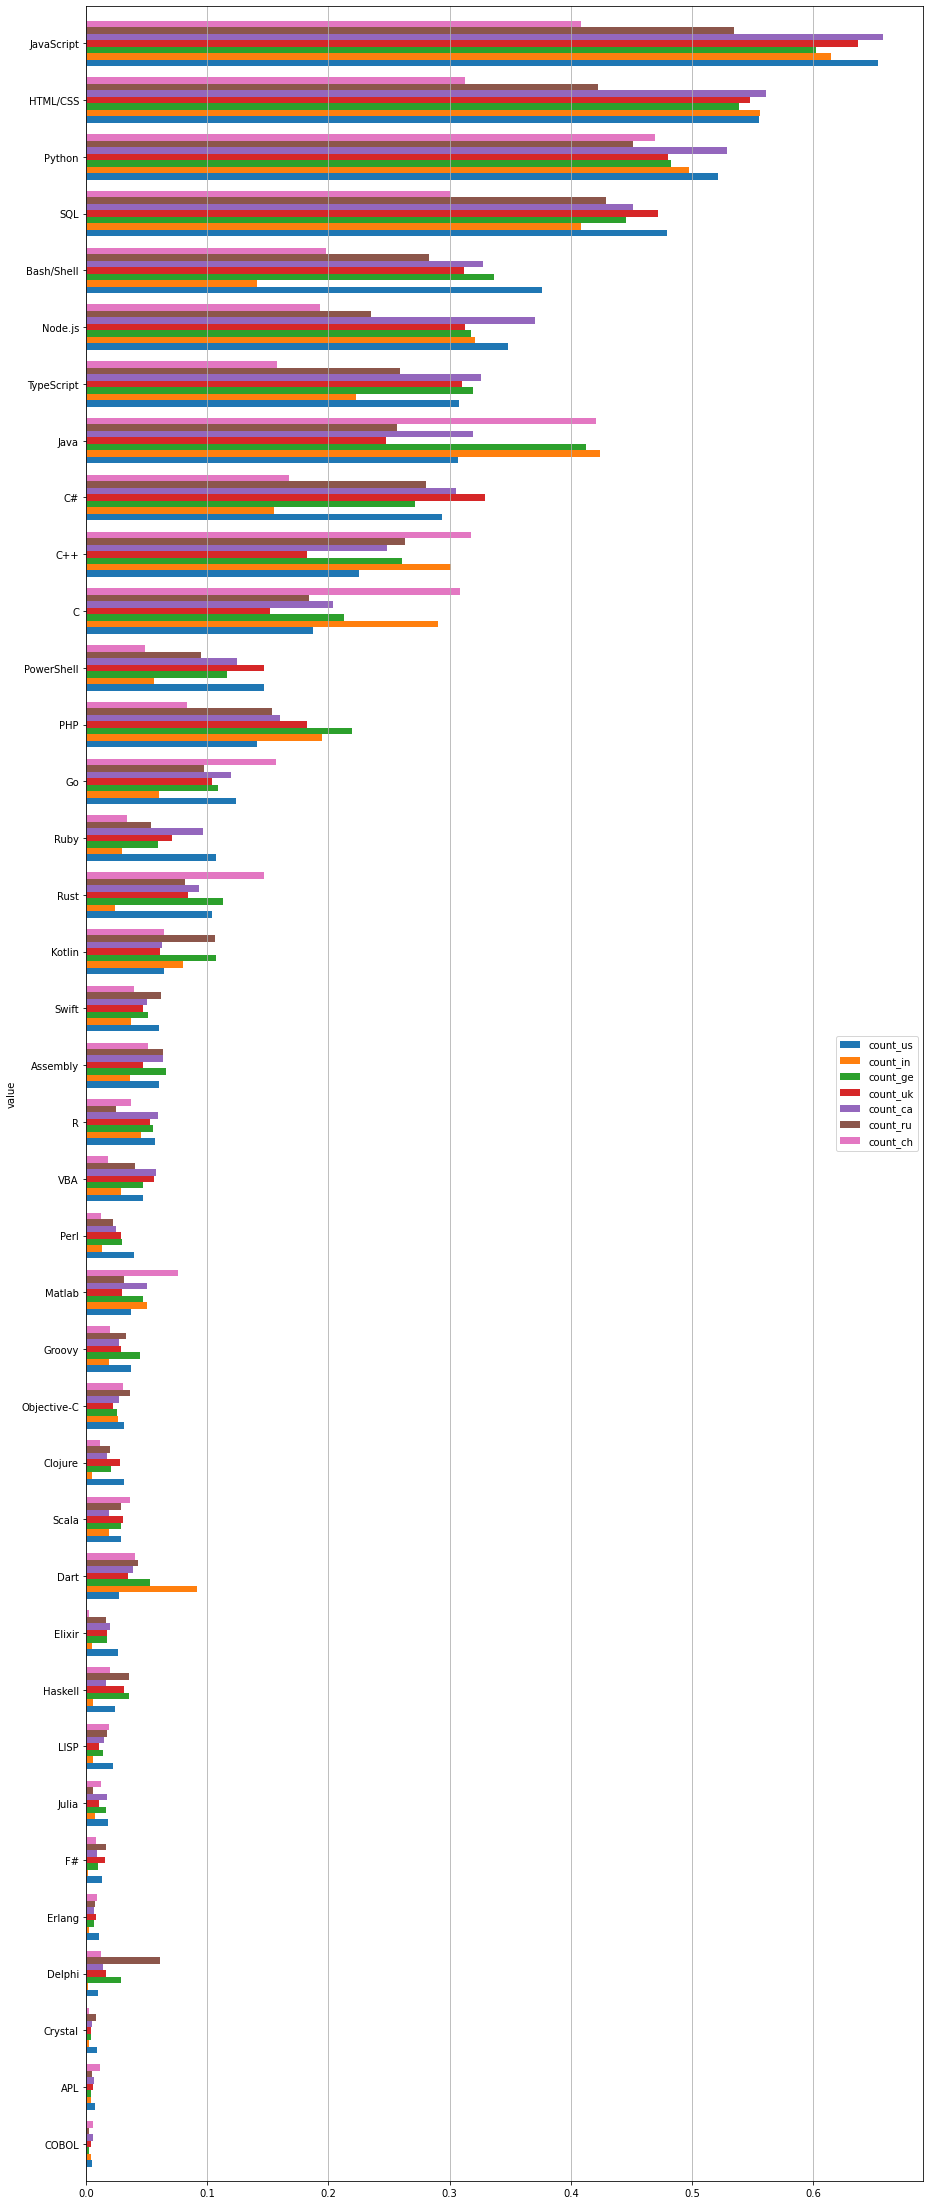

In [12]:
df_lang_worked_joined.plot(kind='barh',figsize=(15,40), width=0.8).grid(axis='x');
plt.legend(loc='center right');

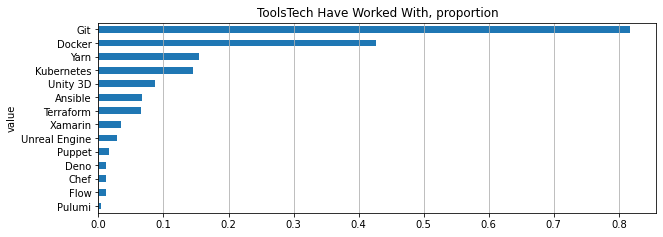

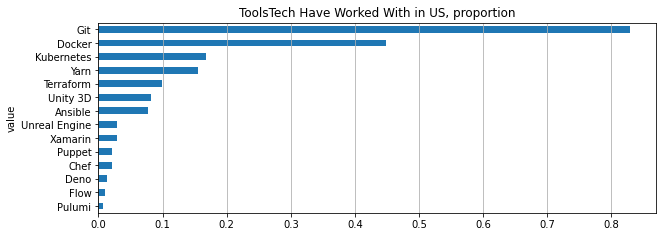

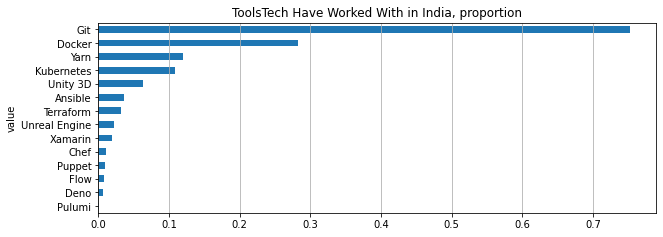

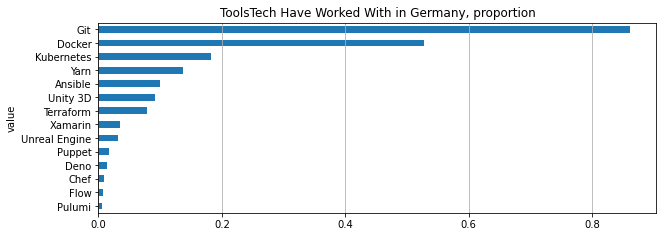

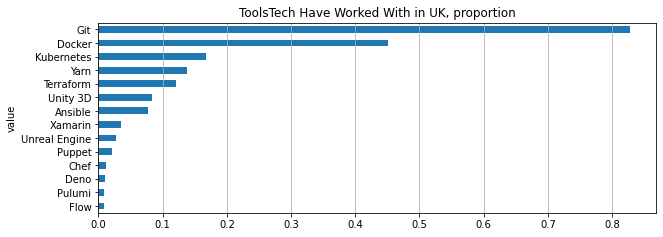

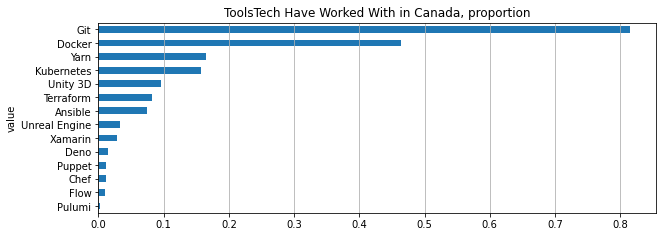

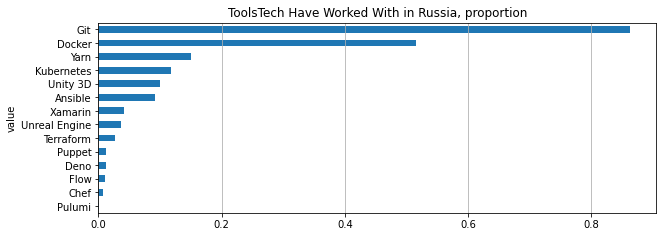

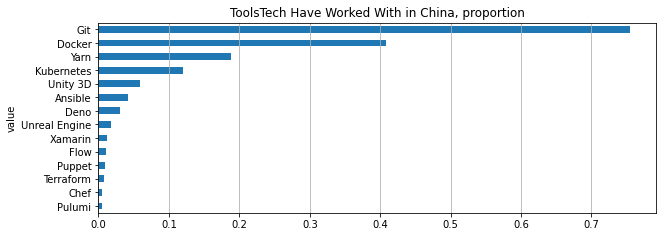

In [13]:
df_ToolsTech_worked = clean_and_plot(df_2021, col='ToolsTechHaveWorkedWith', title='ToolsTech Have Worked With, proportion')

df_ToolsTech_worked_us = clean_and_plot(df_us, col='ToolsTechHaveWorkedWith', col_suffix='_us', title='ToolsTech Have Worked With in US, proportion')
df_ToolsTech_worked_in = clean_and_plot(df_in, col='ToolsTechHaveWorkedWith', col_suffix='_in', title='ToolsTech Have Worked With in India, proportion')
df_ToolsTech_worked_ge = clean_and_plot(df_ge, col='ToolsTechHaveWorkedWith', col_suffix='_ge', title='ToolsTech Have Worked With in Germany, proportion')
df_ToolsTech_worked_uk = clean_and_plot(df_uk, col='ToolsTechHaveWorkedWith', col_suffix='_uk', title='ToolsTech Have Worked With in UK, proportion')
df_ToolsTech_worked_ca = clean_and_plot(df_ca, col='ToolsTechHaveWorkedWith', col_suffix='_ca', title='ToolsTech Have Worked With in Canada, proportion')
df_ToolsTech_worked_ru = clean_and_plot(df_ru, col='ToolsTechHaveWorkedWith', col_suffix='_ru', title='ToolsTech Have Worked With in Russia, proportion')
df_ToolsTech_worked_ch = clean_and_plot(df_ch, col='ToolsTechHaveWorkedWith', col_suffix='_ch', title='ToolsTech Have Worked With in China, proportion')


In [14]:
df_ToolsTech_worked_joined = df_ToolsTech_worked_us.join(
    df_ToolsTech_worked_in).join(
    df_ToolsTech_worked_ge).join(
    df_ToolsTech_worked_uk).join(
    df_ToolsTech_worked_ca).join(
    df_ToolsTech_worked_ru).join(
    df_ToolsTech_worked_ch)
df_ToolsTech_worked_joined

,count_us,count_in,count_ge,count_uk,count_ca,count_ru,count_ch
value,,,,,,,
Pulumi,0.007588,0.000856,0.005689,0.008939,0.002988,0.001357,0.004739
Flow,0.009812,0.007992,0.007822,0.008045,0.009296,0.010176,0.011374
Deno,0.013540,0.006945,0.013867,0.010950,0.014940,0.011533,0.031280
Chef,0.021062,0.010846,0.008533,0.012514,0.010956,0.008141,0.005687
Puppet,0.021913,0.009799,0.016533,0.021676,0.012284,0.012890,0.009479
Xamarin,0.028192,0.019789,0.035378,0.035084,0.027888,0.042062,0.012322
Unreal Engine,0.028454,0.021501,0.031289,0.027263,0.033533,0.036635,0.018009
Ansible,0.077381,0.036057,0.099378,0.076425,0.073705,0.092266,0.042654
Unity 3D,0.082287,0.062411,0.092444,0.083575,0.095286,0.100407,0.058768


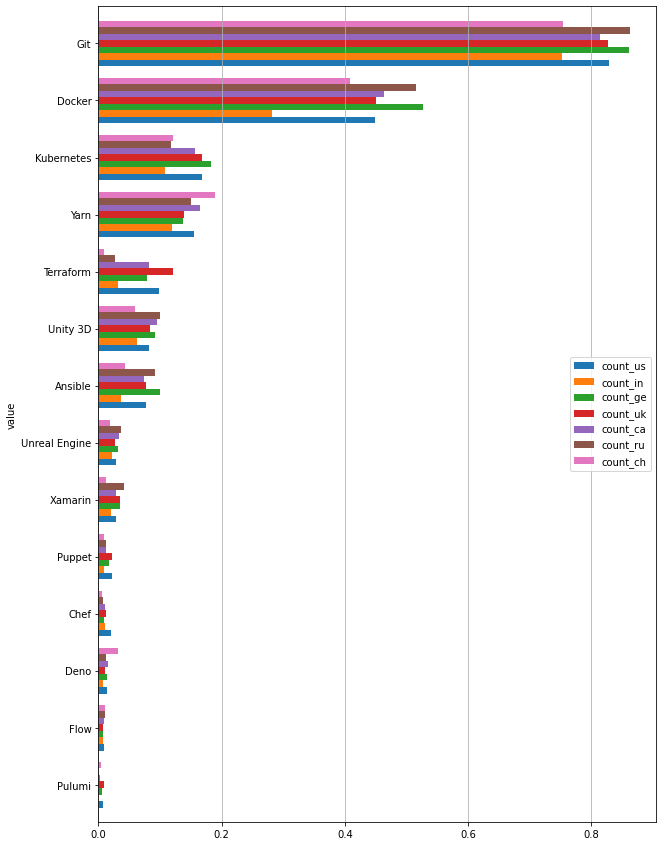

In [15]:
df_ToolsTech_worked_joined.plot(kind='barh',figsize=(10,15), width=0.8).grid(axis='x');
plt.legend(loc='center right');


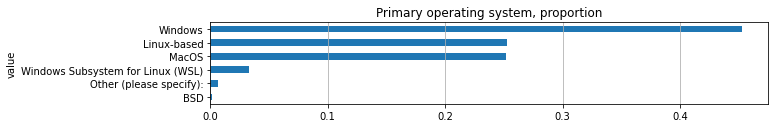

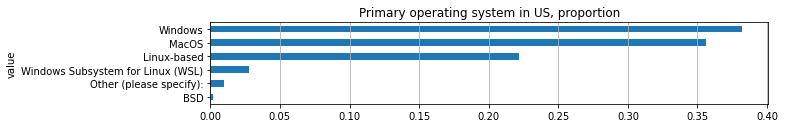

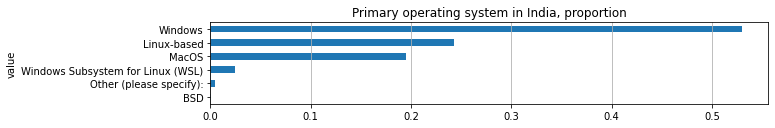

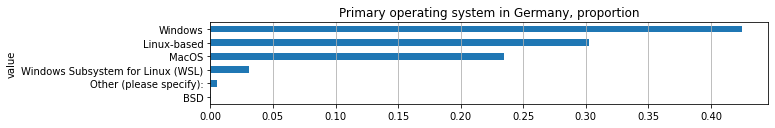

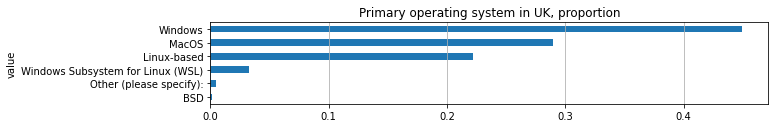

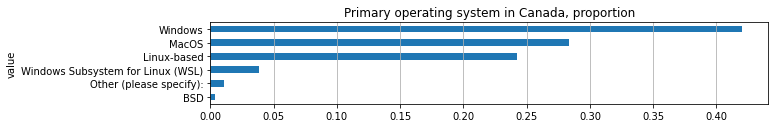

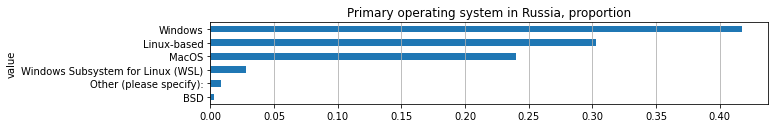

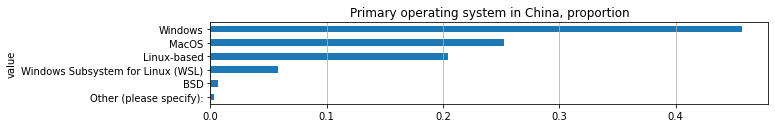

In [18]:
df_OpSys = clean_and_plot(df_2021, col='OpSys', title='Primary operating system, proportion')

df_OpSys_us = clean_and_plot(df_us, col='OpSys', col_suffix='_us', title='Primary operating system in US, proportion')
df_OpSys_in = clean_and_plot(df_in, col='OpSys', col_suffix='_in', title='Primary operating system in India, proportion')
df_OpSys_ge = clean_and_plot(df_ge, col='OpSys', col_suffix='_ge', title='Primary operating system in Germany, proportion')
df_OpSys_uk = clean_and_plot(df_uk, col='OpSys', col_suffix='_uk', title='Primary operating system in UK, proportion')
df_OpSys_ca = clean_and_plot(df_ca, col='OpSys', col_suffix='_ca', title='Primary operating system in Canada, proportion')
df_OpSys_ru = clean_and_plot(df_ru, col='OpSys', col_suffix='_ru', title='Primary operating system in Russia, proportion')
df_OpSys_ch = clean_and_plot(df_ch, col='OpSys', col_suffix='_ch', title='Primary operating system in China, proportion')


In [19]:
df_OpSys_joined = df_OpSys_us.join(
    df_OpSys_in).join(
    df_OpSys_ge).join(
    df_OpSys_uk).join(
    df_OpSys_ca).join(
    df_OpSys_ru).join(
    df_OpSys_ch)
df_OpSys_joined

,count_us,count_in,count_ge,count_uk,count_ca,count_ru,count_ch
value,,,,,,,
BSD,0.001832,0.000951,0.000711,0.001117,0.003652,0.002714,0.006635
Other (please specify):,0.009746,0.005042,0.005689,0.005140,0.010624,0.008141,0.002844
Windows Subsystem for Linux (WSL),0.027669,0.024165,0.031289,0.032626,0.038845,0.027815,0.057820
Linux-based,0.221415,0.242984,0.302756,0.221676,0.242364,0.302578,0.204739
MacOS,0.355965,0.194558,0.234667,0.289385,0.283201,0.240163,0.252133
Windows,0.381803,0.529731,0.424533,0.449162,0.419987,0.417232,0.456872


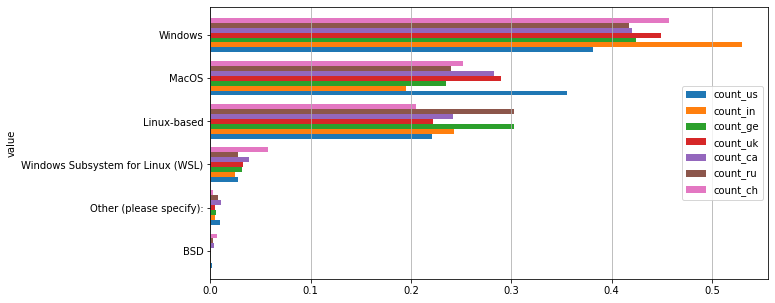

In [22]:
df_OpSys_joined.plot(kind='barh',figsize=(10,5), width=0.8).grid(axis='x');
plt.legend(loc='center right');

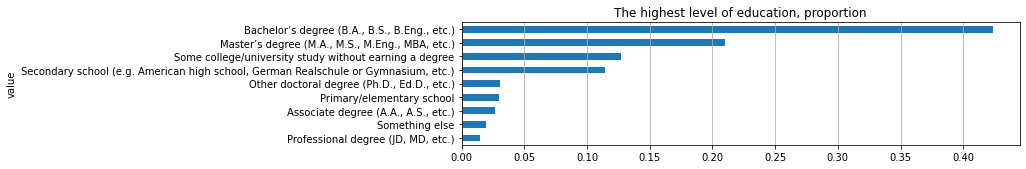

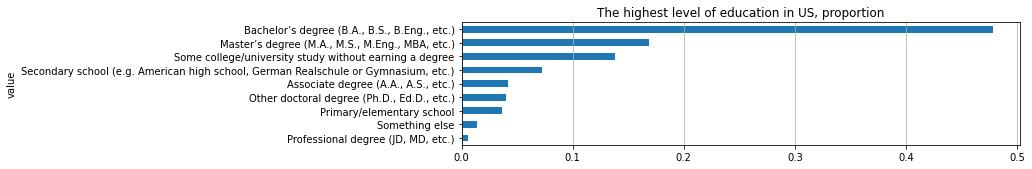

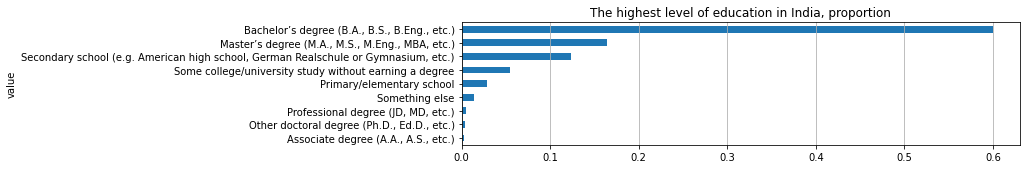

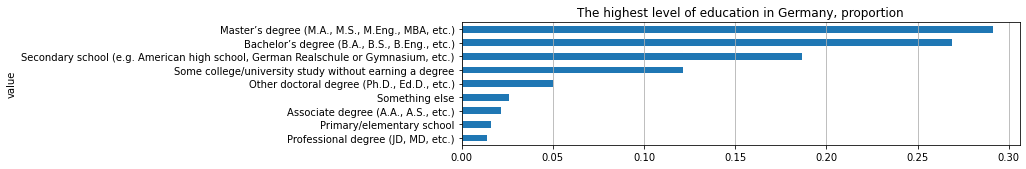

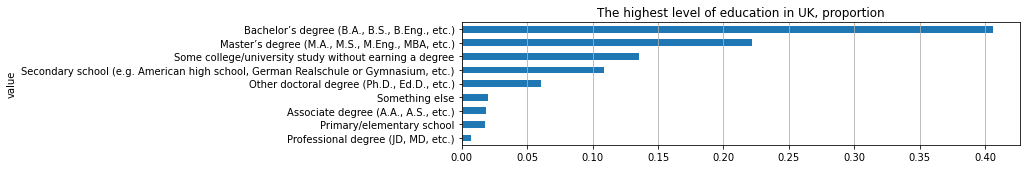

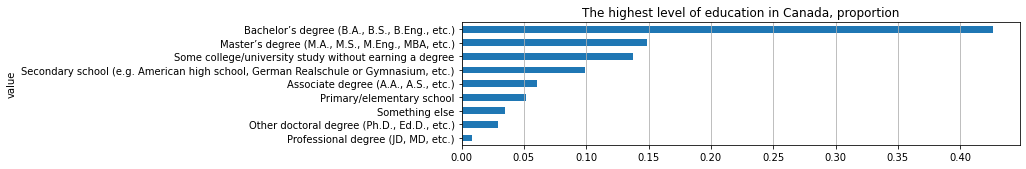

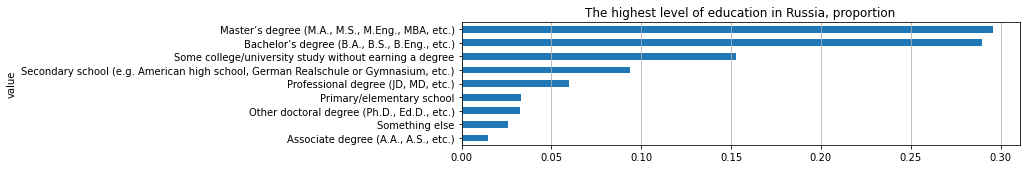

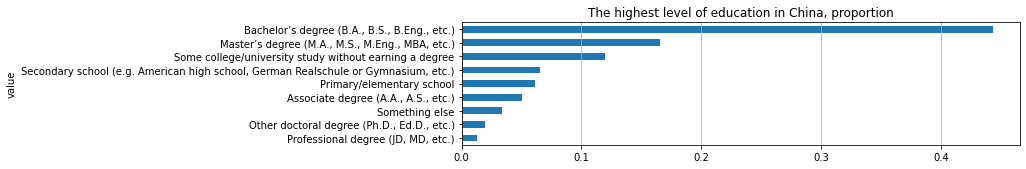

In [25]:
df_EdLevel = clean_and_plot(df_2021, col='EdLevel', title='The highest level of education, proportion')

df_EdLevel_us = clean_and_plot(df_us, col='EdLevel', col_suffix='_us', title='The highest level of education in US, proportion')
df_EdLevel_in = clean_and_plot(df_in, col='EdLevel', col_suffix='_in', title='The highest level of education in India, proportion')
df_EdLevel_ge = clean_and_plot(df_ge, col='EdLevel', col_suffix='_ge', title='The highest level of education in Germany, proportion')
df_EdLevel_uk = clean_and_plot(df_uk, col='EdLevel', col_suffix='_uk', title='The highest level of education in UK, proportion')
df_EdLevel_ca = clean_and_plot(df_ca, col='EdLevel', col_suffix='_ca', title='The highest level of education in Canada, proportion')
df_EdLevel_ru = clean_and_plot(df_ru, col='EdLevel', col_suffix='_ru', title='The highest level of education in Russia, proportion')
df_EdLevel_ch = clean_and_plot(df_ch, col='EdLevel', col_suffix='_ch', title='The highest level of education in China, proportion')


In [26]:
df_EdLevel_joined = df_EdLevel_us.join(
    df_EdLevel_in).join(
    df_EdLevel_ge).join(
    df_EdLevel_uk).join(
    df_EdLevel_ca).join(
    df_EdLevel_ru).join(
    df_EdLevel_ch)
df_EdLevel_joined

,count_us,count_in,count_ge,count_uk,count_ca,count_ru,count_ch
value,,,,,,,
"Professional degree (JD, MD, etc.)",0.006214,0.005423,0.014044,0.007374,0.008300,0.059701,0.013270
Something else,0.014129,0.013605,0.025778,0.019888,0.034529,0.025780,0.034123
Primary/elementary school,0.036041,0.028256,0.016178,0.018101,0.051461,0.033243,0.061611
"Other doctoral degree (Ph.D., Ed.D., etc.)",0.039704,0.003901,0.049956,0.060559,0.029548,0.032564,0.019905
"Associate degree (A.A., A.S., etc.)",0.041732,0.002474,0.021867,0.018771,0.060425,0.014925,0.050237
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",0.072410,0.123585,0.186489,0.108380,0.098938,0.093623,0.065403
Some college/university study without earning a degree,0.137886,0.054895,0.121600,0.135866,0.137782,0.152646,0.119431
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",0.168629,0.163828,0.291378,0.221676,0.149070,0.295794,0.165877
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",0.478480,0.600133,0.269156,0.405810,0.426295,0.289688,0.443602


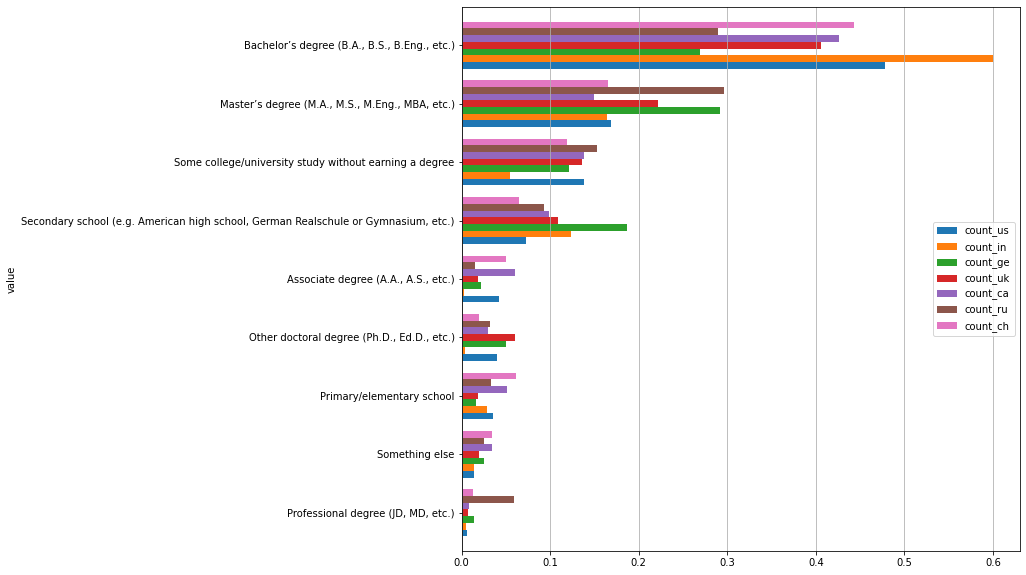

In [28]:
df_EdLevel_joined.plot(kind='barh',figsize=(10,10), width=0.8).grid(axis='x');
plt.legend(loc='center right');

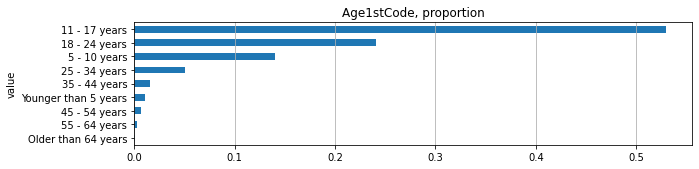

In [29]:
df_EdLevel = clean_and_plot(df_2021, col='Age1stCode', title='Age1stCode, proportion')

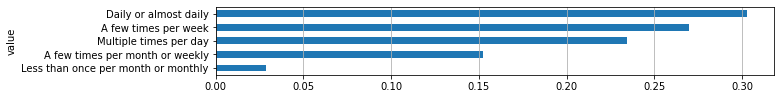

In [35]:
df_SOVisitFreq = clean_and_plot(df_2021, col='SOVisitFreq')